## Analyse Tags Column


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
videos_dataset=pd.read_csv('USvideos.csv',error_bad_lines=False)
videos_dataset.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [4]:
tag_comments=' '.join(videos_dataset['tags'])

In [7]:
videos_dataset['tags'][0]  #We see that there are special charatcters like the '/' that must be removed.

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [8]:
import re  #This is the regular expression library

In [9]:
clean_tags=re.sub('[^a-zA-Z]',' ',tag_comments)

In [11]:
clean_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [12]:
#We see that there are some extra spaces that needs to be removed
cleaned_tags=re.sub(' +',' ',clean_tags)
cleaned_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

In [14]:
#We import our wordcloud library
from wordcloud import WordCloud,STOPWORDS

(-0.5, 999.5, 499.5, -0.5)

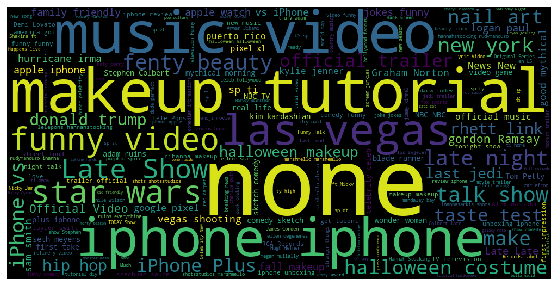

In [16]:
visuals=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(cleaned_tags)
plt.figure(figsize=(15,5))
plt.imshow(visuals)
plt.axis('off')

#This wordcloud will help us visualize the trending tags on youtube

## Analyzing likes,views, dislikes and finding their co-relationship

Text(0.5, 1.0, 'Regression Plot for likes vs views')

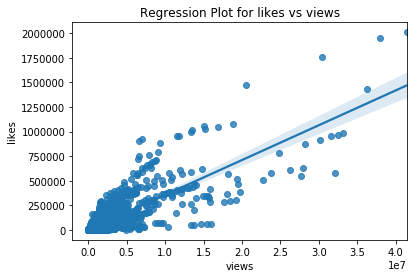

In [17]:
#Here, we use the regression plot technique
#For views and likes
sns.regplot(data=videos_dataset,x='views',y='likes')
plt.title('Regression Plot for likes vs views')

In [18]:
#From the regression plots above, we see that both likes and views are highly 
#co-related,i.e, if views increases, likes also increases.

Text(0.5, 1.0, 'Regression Plot for dislikes vs views')

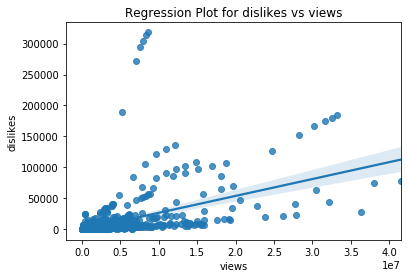

In [19]:
#Then for views and dislikes
sns.regplot(data=videos_dataset,x='views',y='dislikes')
plt.title('Regression Plot for dislikes vs views')

In [20]:
#From here, views and dislikes are not very co-related

Text(0.5, 1, 'Co-relationship between views,likes and dislikes')

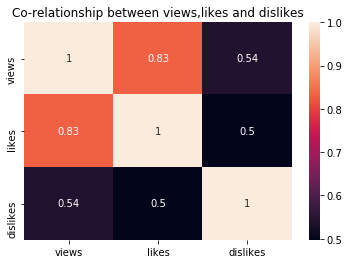

In [22]:
#Now we want to see the co-relation between the three features all at ones
cor_df=videos_dataset[['views','likes','dislikes']]
sns.heatmap(cor_df.corr(),annot=True)
plt.title('Co-relationship between views,likes and dislikes')